In [76]:
import pandas as pd
import os
import numpy as np
import sys
sys.path.append('..')

In [78]:
os.chdir(r'C:\Users\Administrator\Desktop\raphi_other\repositories\template_project\src')

In [132]:
data = pd.read_csv(r'../data/interim/house_data.csv')

In [134]:
#test = pd.read_csv(r'../data/interim/test.csv')

In [136]:
numerical_df = data.select_dtypes(exclude=['object'])
categorical_df = data.select_dtypes(include=['object'])

In [138]:
columns_to_drop = ['state']#, 'SCC', 'SMOKE', 'FAVC', 'MTRANS']
data = data.drop(columns=columns_to_drop)

In [140]:
x = data.drop(columns=['price'])
y = data.price

In [142]:
y

0        450000000.0
1        120000000.0
2         40000000.0
3         75000000.0
4        450000000.0
            ...     
23083     15000000.0
23084     25000000.0
23085     68000000.0
23086     78000000.0
23087     65000000.0
Name: price, Length: 23088, dtype: float64

In [92]:
x.to_csv('../data/interim/house_xinit.csv', index=False)
y.to_csv('../data/interim/house_yinit.csv', index=False)

In [57]:
#y.value_counts()

# Ordinal Encoding of y

In [94]:
y = pd.Series(y, name='y')

In [62]:
y

0        450000000.0
1        120000000.0
2         40000000.0
3         75000000.0
4        450000000.0
            ...     
23083     15000000.0
23084     25000000.0
23085     68000000.0
23086     78000000.0
23087     65000000.0
Name: y, Length: 23088, dtype: float64

In [144]:
numerical_df = x.select_dtypes(exclude=['object'])
categorical_df = x.select_dtypes(include=['object'])

In [146]:
numerical_df

bedrooms  bathrooms  toilets  parking_space
0           6.0        5.0      5.0            4.0
1           4.0        5.0      5.0            4.0
2           4.0        4.0      5.0            6.0
3           4.0        4.0      5.0            2.0
4           5.0        5.0      6.0            1.0
...         ...        ...      ...            ...
23083       2.0        2.0      2.0            4.0
23084       4.0        5.0      5.0            4.0
23085       4.0        5.0      5.0            4.0
23086       3.0        4.0      4.0            3.0
23087       4.0        5.0      5.0            4.0

[23088 rows x 4 columns]

In [148]:
categorical_df

title                  town
0           Detached Duplex               Mabushi
1           Detached Duplex                 Lekki
2           Detached Duplex                  Ajah
3      Semi Detached Duplex                 Lekki
4           Detached Duplex                 Lekki
...                     ...                   ...
23083        Block of Flats                Kabusa
23084        Block of Flats           Ado-Odo/Ota
23085       Detached Duplex                 Lekki
23086        Block of Flats  Victoria Island (VI)
23087       Detached Duplex                 Lekki

[23088 rows x 2 columns]

In [150]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in x.columns if x[cname].nunique() < 8 and x[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in x.columns if x[cname].dtype in ['int64', 'float64']]

In [152]:
categorical_cols

['title']

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [50]:
# X_train.to_csv('../data/interim/x_train_init.csv', index=False)
# X_test.to_csv('../data/interim/x_test_init.csv', index=False)
# y_train.to_csv('../data/interim/y_train_init.csv', index=False)
# y_test.to_csv('../data/interim/y_test_init.csv', index=False)

In [164]:
X_train.head()

bedrooms  bathrooms  toilets  parking_space              title   town
937         3.0        3.0      3.0            4.0  Detached Bungalow   Ajah
9729        4.0        5.0      5.0            4.0    Detached Duplex  Lekki
16861       4.0        4.0      5.0            3.0    Detached Duplex  Lekki
9816        4.0        4.0      5.0            4.0  Terraced Duplexes  Lekki
3459        5.0        5.0      6.0            6.0    Detached Duplex    Ojo

In [55]:
print(y_train)

1846     5
14225    6
9438     2
12459    1
12189    6
        ..
11284    2
11964    3
5390     2
860      6
15795    4
Name: y, Length: 14530, dtype: int8


In [158]:
from category_encoders import TargetEncoder

In [166]:
#create numerical transformer
numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')), 
                                  ('scaler', StandardScaler()) ])

#create categorical transformer
categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
                                            ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                            ])

target_encoding_pipeline = Pipeline(steps=[
    ('target_encoder', TargetEncoder(cols=['town']))
])

In [168]:
# Combine the transformations using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('target_town', target_encoding_pipeline, ['town']),  # TargetEncoder for 'town'
    ('num', numerical_transformer, numerical_cols),       # Transformer for numerical columns
    ('cat_onehot', categorical_transformer, categorical_cols) # OneHotEncoder for other categorical features
], remainder='passthrough')

In [84]:
# #column transformer
# preprocessor = ColumnTransformer(
#                                 transformers=[
#                                     ('num', numerical_transformer, numerical_cols),
#                                     ('cat', categorical_transformer, categorical_cols)
#     ])

# Regression just a tree

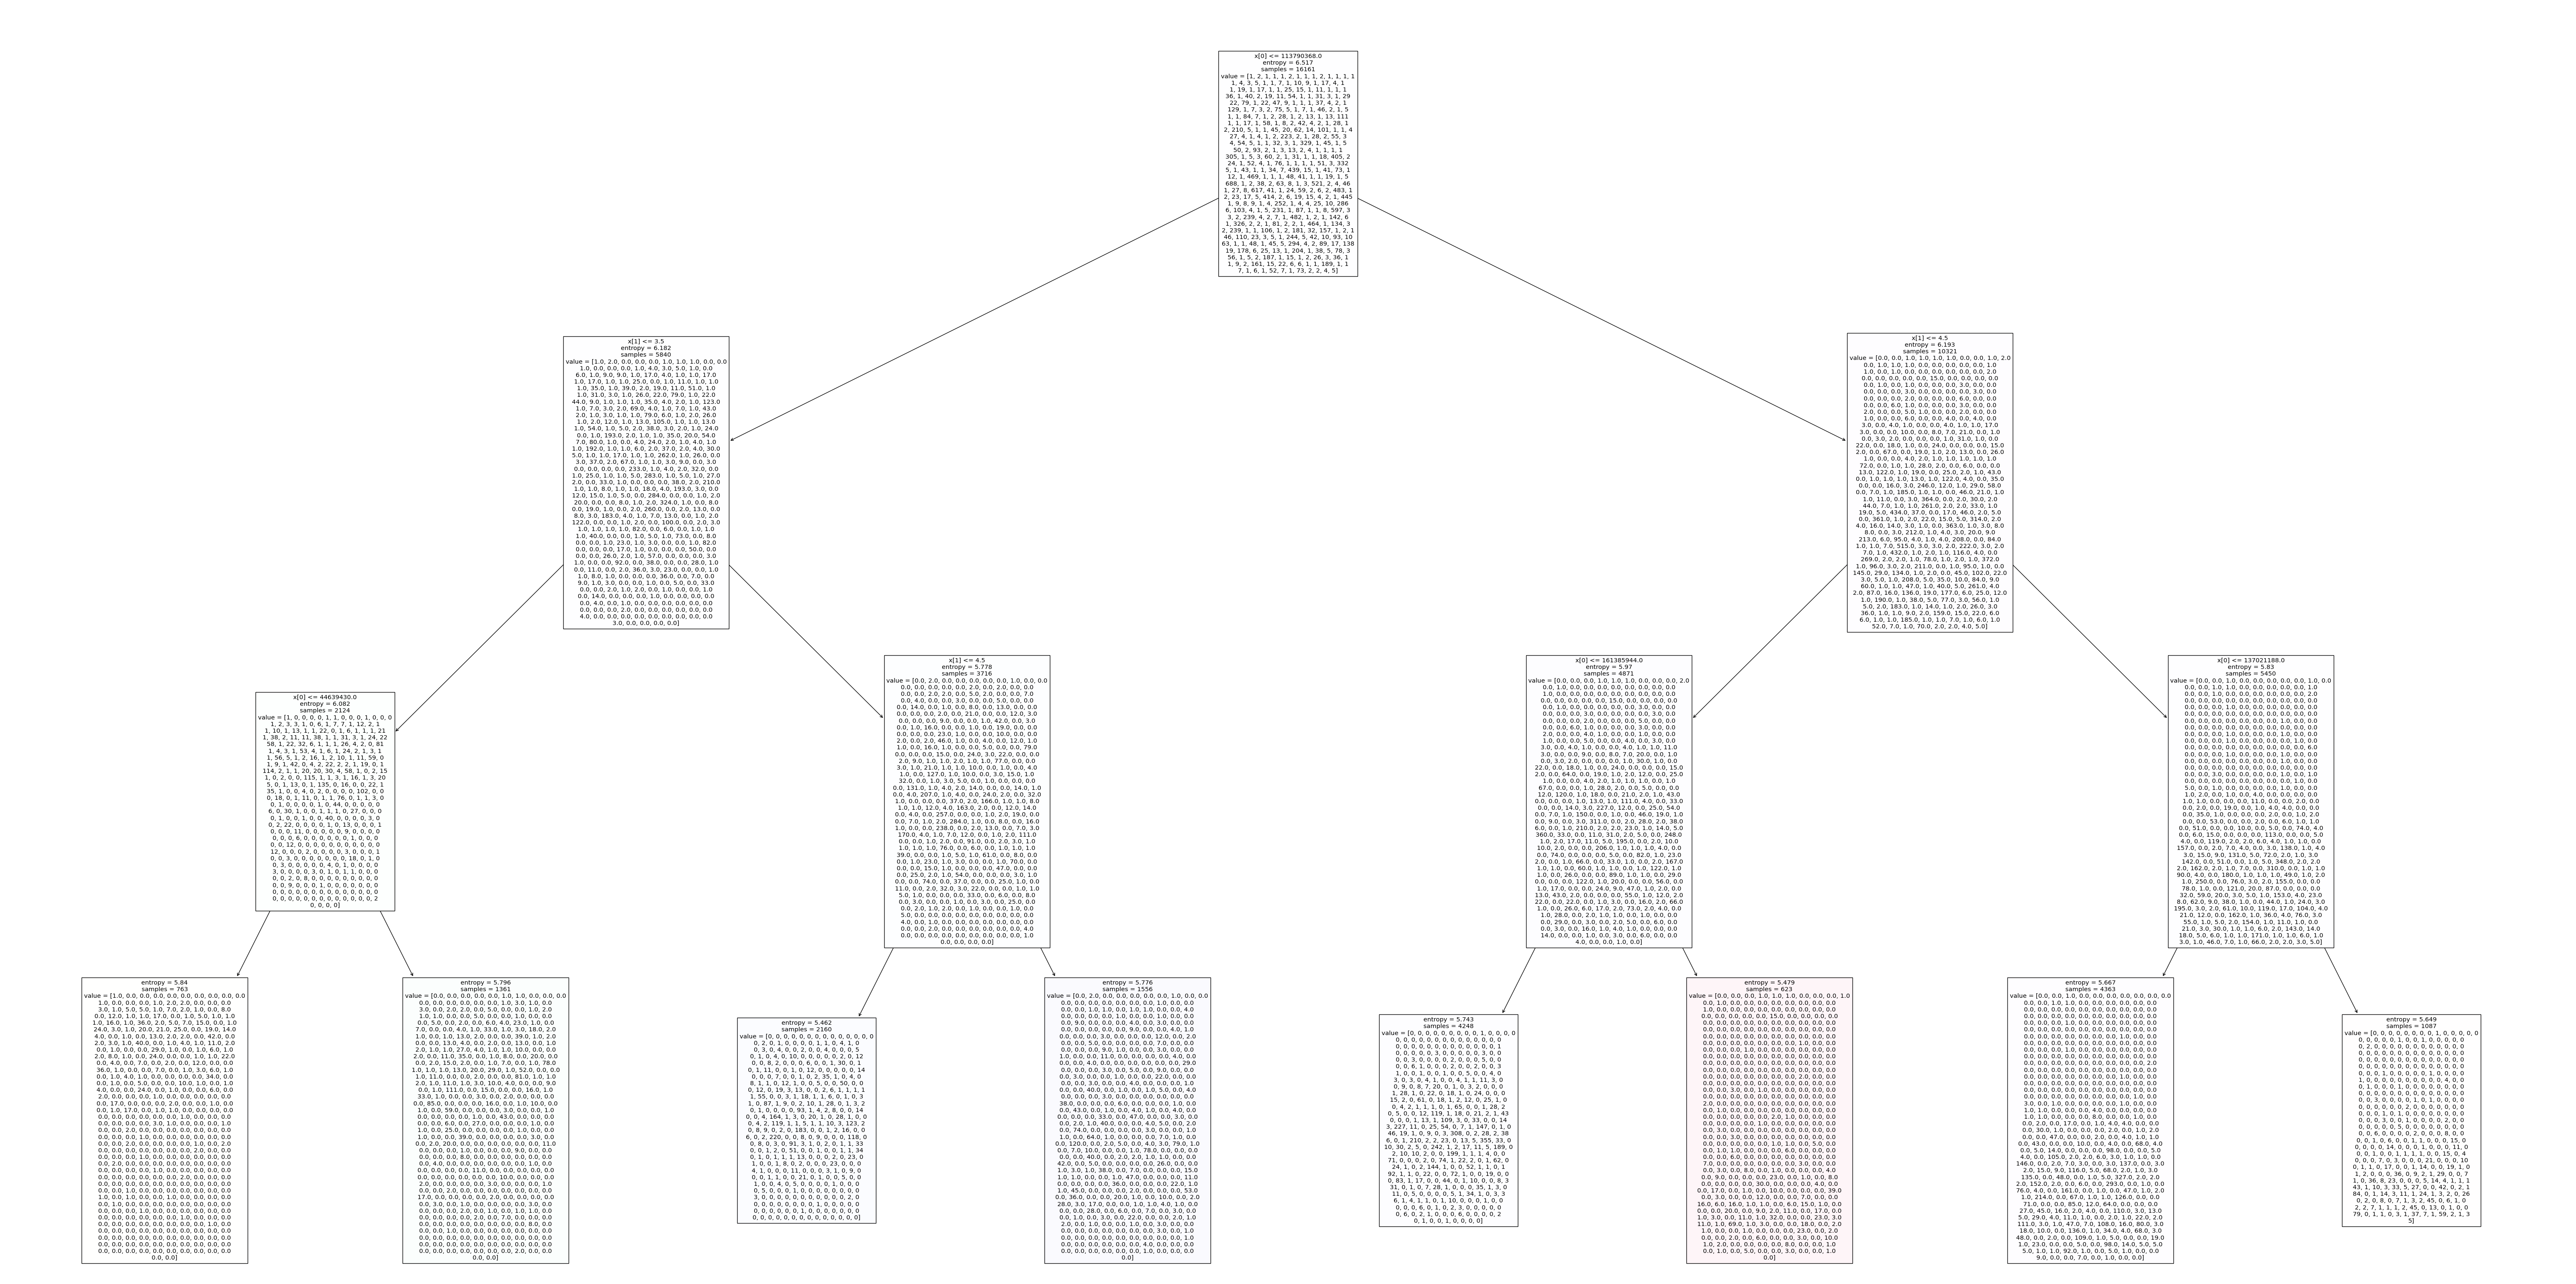

In [49]:
#show decision tree
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (80,40)
tree.plot_tree(rf,filled = True);
#plt.savefig('./images/tree_example.png')

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import tree

rf = RandomForestRegressor(random_state=42, criterion='squared_error')

# Model pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('random_forest', rf)
                         ])

# Fit model on training data
rf_pipe.fit(X_train, y_train)

# Get predictions on test data
rf_preds = rf_pipe.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, rf_preds)
mae = mean_absolute_error(y_test, rf_preds)
r2 = r2_score(y_test, rf_preds)

# Print evaluation metrics
print(f'Mean Squared Error (MSE) for a single tree Model: {mse:.2f}')
print(f'Mean Absolute Error (MAE) for a single tree Model: {mae:.2f}')
print(f'R-squared (R2) for for a single tree Model: {r2:.2f}')


Mean Squared Error (MSE) for a single tree Model: 4805998909038361.00
Mean Absolute Error (MAE) for a single tree Model: 43644543.04
R-squared (R2) for for a single tree Model: 0.54


In [171]:
#show decision tree
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (80,40)
tree.plot_tree(rf,filled = True);
#plt.savefig('./images/tree_example.png')

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestRegressor(random_state=42) instead.

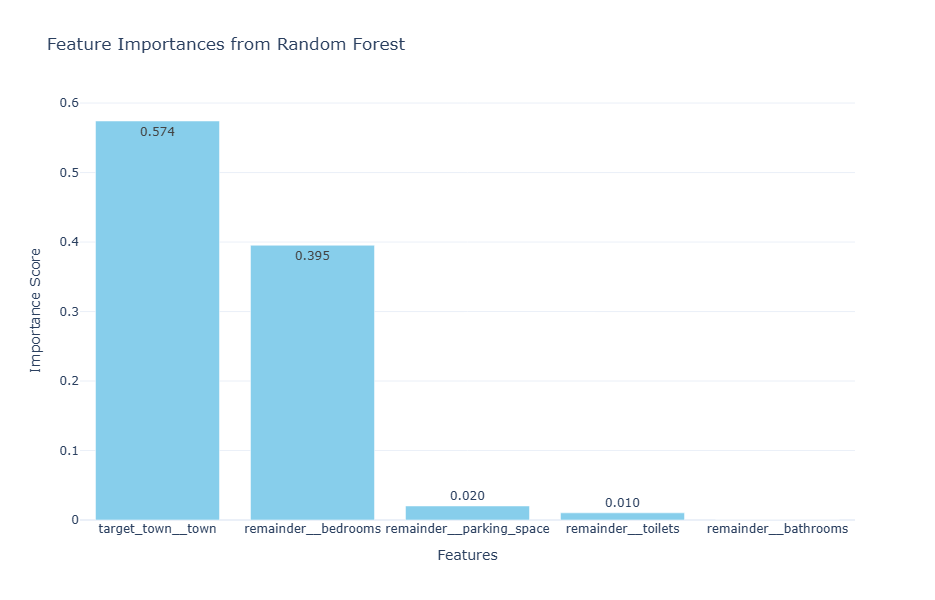

In [43]:
import plotly.graph_objects as go
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

importances = rf.feature_importances_

# Get the feature importances from the Random Forest model
# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Optional: Sort the dictionary by importance in descending order
feature_importance_sorted = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

fig = go.Figure(data=[
        go.Bar(
            x=list(feature_importance_sorted.keys()),
            y=list(feature_importance_sorted.values()),
            marker=dict(color='skyblue'),
            text=[f"{v:.3f}" for v in feature_importance_sorted.values()],
            textposition='auto'
        )
    ])

# Update layout for better aesthetics
fig.update_layout(
    title='Feature Importances from Random Forest',
    xaxis_title='Features',
    yaxis_title="Importance Score",
    template='plotly_white',
    height=600
)

# Display the figure
fig.show()